In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [29]:
df=pd.read_csv('../../../data/initial_clean_lc')

In [30]:
df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,KS,128,415,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,1,OH,107,415,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,2,NJ,137,415,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,3,OH,84,408,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,4,OK,75,415,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   state                   3333 non-null   object 
 2   account_length          3333 non-null   int64  
 3   area_code               3333 non-null   int64  
 4   international_plan      3333 non-null   bool   
 5   voice_mail_plan         3333 non-null   bool   
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [32]:
df.isna().sum()
#Nice

Unnamed: 0                0
state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [33]:
len(df['state'])

3333

In [34]:
df.describe()
df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,KS,128,415,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,1,OH,107,415,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,2,NJ,137,415,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,3,OH,84,408,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,4,OK,75,415,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [38]:
#scaling stuff

X = df.drop(['churn', 'state'], axis = 1) #no state for now
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .25)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)




In [39]:
#log reg stuff
model = LogisticRegression(random_state=42)

model.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_hat_train = model.predict(X_train_sc)
y_hat_test = model.predict(X_test_sc)

In [42]:
recall_score(y_test, y_hat_test)

0.184

In [43]:
recall_score(y_train, y_hat_train)

0.20949720670391062

In [44]:
confusion_matrix(y_train, y_hat_train)

array([[2084,   57],
       [ 283,   75]])

In [45]:
#Oh man that aint good
#Next morning cut some stuff we dont need area code for instance

In [50]:
#model2
#scaling stuff

X = df[['international_plan', 'customer_service_calls', 'total_day_calls']] #top3 
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .25)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)


model2 = LogisticRegression(random_state=42)

model2.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_hat_train2 = model2.predict(X_train_sc)
y_hat_test2 = model2.predict(X_test_sc)

In [52]:
recall_score(y_test, y_hat_test)

0.184

In [53]:
recall_score(y_train, y_hat_train)

0.20949720670391062

In [54]:
confusion_matrix(y_train, y_hat_train)

array([[2084,   57],
       [ 283,   75]])

Text(0.5, 1.0, 'Total Day Minutes and Churn')

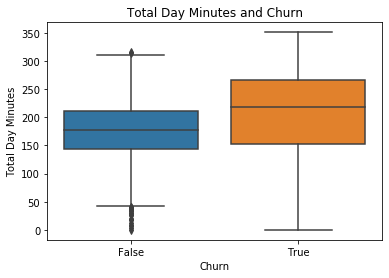

In [60]:
#Visualizations cuz why not
ax = sns.boxplot(x = "churn", y = "total_day_minutes", data = df)
ax.set(xlabel = "Churn", ylabel = "Total Day Minutes")
ax.set_title("Total Day Minutes and Churn")

Text(0.5, 1.0, '# Of Customer Service Calls and Churn')

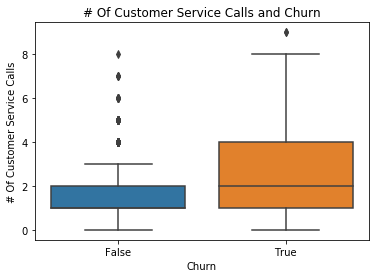

In [61]:
ax2 = sns.boxplot(x = "churn", y = "customer_service_calls", data = df)
ax2.set(xlabel = "Churn", ylabel = "# Of Customer Service Calls")
ax2.set_title("# Of Customer Service Calls and Churn")

Text(0.5, 1.0, '% Has International Plan and Churn')

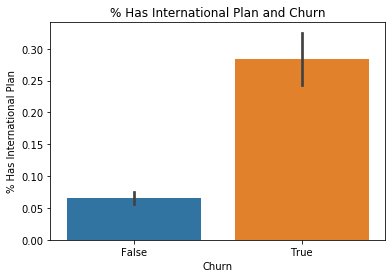

In [62]:
ax3 = sns.barplot(x = "churn", y = "international_plan", data = df)
ax3.set(xlabel = "Churn", ylabel = "% Has International Plan")
ax3.set_title("% Has International Plan and Churn")